In [17]:
from pm4py.objects.log.importer.xes import factory as xes_import_factory
from pm4py.algo.filtering.log.attributes import attributes_filter

In [38]:
log = xes_import_factory.apply("data/BPI_Challenge_2013_open_problems.xes")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use importer entrypoint instead
  """Entry point for launching an IPython kernel.


In [39]:
log

[{'events': [{'impact': 'Medium', 'product': 'PROD753', 'org:resource': 'Tomas', 'org:group': 'Org line A2', 'org:role': 'A2_2', 'oranization country': 'cn', 'lifecycle:transition': 'In Progress', 'time:timestamp': datetime.datetime(2006, 11, 7, 10, 0, 36, tzinfo=datetime.timezone(datetime.timedelta(0, 3600))), 'resource country': 'Sweden', 'concept:name': 'Accepted'}, '..', {'impact': 'Medium', 'product': 'PROD753', 'org:resource': 'Tomas', 'org:group': 'Org line A2', 'org:role': 'A2_2', 'oranization country': 'cn', 'lifecycle:transition': 'In Progress', 'time:timestamp': datetime.datetime(2011, 9, 3, 7, 9, 9, tzinfo=datetime.timezone(datetime.timedelta(0, 7200))), 'resource country': 'Sweden', 'concept:name': 'Accepted'}], 'attributes': {'concept:name': '1-147898401'}}, '....', {'events': [{'impact': 'Medium', 'product': 'PROD236', 'org:resource': 'Ian', 'org:group': 'Org line A2', 'org:role': 'A2_1', 'oranization country': 'gb', 'lifecycle:transition': 'In Progress', 'time:timestamp

In [40]:
activities = attributes_filter.get_attribute_values(log, "concept:name")

In [41]:
activities

{'Accepted': 1581, 'Completed': 387, 'Queued': 383}

## Alpha Miner

In [42]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  after removing the cwd from sys.path.


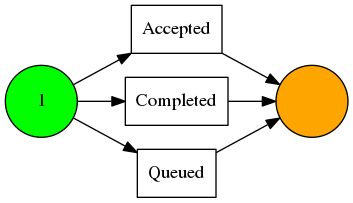

In [43]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

gviz5 = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz5)

## Inductive Miner

In [44]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

net1, initial_marking1, final_marking1 = inductive_miner.apply(log)

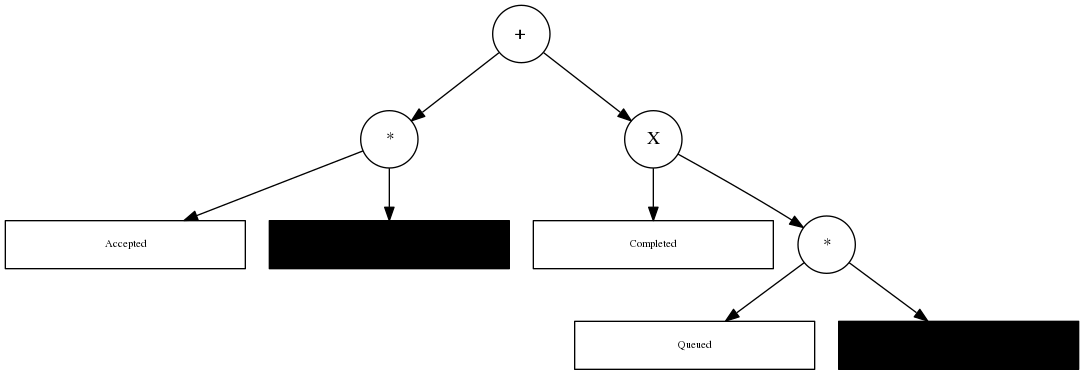

In [45]:
from pm4py.visualization.process_tree import visualizer as pt_visualizer

tree = inductive_miner.apply_tree(log)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

## Heuristic Miner

In [46]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

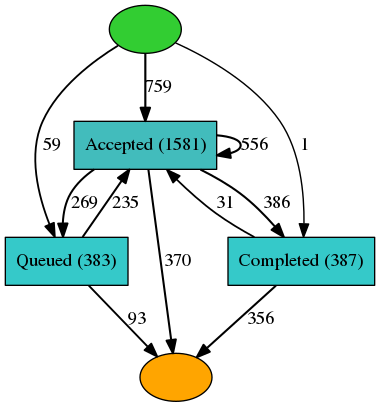

In [47]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz2 = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz2)

## Directly-Follows Graph

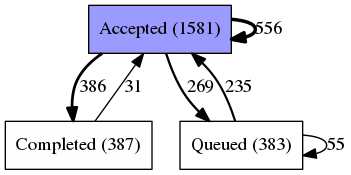

In [48]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(log)

from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz3 = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz3)

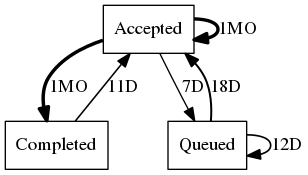

In [49]:
dfg2 = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz4 = dfg_visualization.apply(dfg2, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz4)
#dfg_visualization.save(gviz4, "dfg.svg")